# Assignment 4 WBT 
# Name: Moses Mbabaali 
# Matricola: 4846019

In [104]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD, Adam, Adagrad, Adadelta, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [105]:
# Get the data
with open("semeion.data") as textFile:
    data = [line.split() for line in textFile]

In [21]:
# Just reconverted the original data into this way it was way easier operating in this mode 
data = np.asarray(data)
data = data.astype(float)

In [22]:
# The x values 
X = data[:,:-10]
print(X.shape)
X

(1593, 256)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
# The y values 
y = data[:,-10:]
print(y.shape)
y

(1593, 10)


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [24]:
# Matrix as a 16 by 16 for an individual element
X[0].reshape((16,16))

array([[0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,

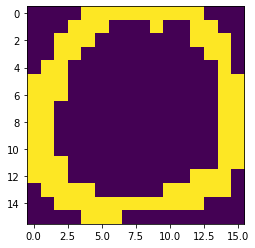

In [25]:
# Visualizing the 16x16 matrix as image
plt.imshow(X[7].reshape((16,16)))

In [26]:
# Data splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2)

In [28]:
# Simple sequential model
model = Sequential()
model.add(Dense(100, activation='sigmoid', input_shape = (X.shape[1],), use_bias=True, bias_initializer='ones'))
model.add(Dense(y.shape[1], activation='sigmoid', use_bias=True, bias_initializer='ones'))
my_optimizer = SGD(lr=0.1)
model.compile(optimizer=my_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping_monitor = EarlyStopping(patience=2)

history = model.fit(X_train, y_train, validation_split=0.3, epochs=60, verbose=2, callbacks=[early_stopping_monitor])
history

score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])
print('Test loss:', score[0])

y_pred = model.predict(X_test)

Epoch 1/60
25/25 - 1s - loss: 2.2686 - accuracy: 0.1564 - val_loss: 2.1366 - val_accuracy: 0.2179
Epoch 2/60
25/25 - 0s - loss: 2.0347 - accuracy: 0.3269 - val_loss: 1.9339 - val_accuracy: 0.2657
Epoch 3/60
25/25 - 0s - loss: 1.8033 - accuracy: 0.5487 - val_loss: 1.6805 - val_accuracy: 0.5433
Epoch 4/60
25/25 - 0s - loss: 1.5516 - accuracy: 0.6577 - val_loss: 1.4489 - val_accuracy: 0.6627
Epoch 5/60
25/25 - 0s - loss: 1.3371 - accuracy: 0.7551 - val_loss: 1.2343 - val_accuracy: 0.7403
Epoch 6/60
25/25 - 0s - loss: 1.1500 - accuracy: 0.8115 - val_loss: 1.0281 - val_accuracy: 0.8358
Epoch 7/60
25/25 - 0s - loss: 1.0003 - accuracy: 0.8397 - val_loss: 0.8879 - val_accuracy: 0.8716
Epoch 8/60
25/25 - 0s - loss: 0.8824 - accuracy: 0.8321 - val_loss: 0.7843 - val_accuracy: 0.8836
Epoch 9/60
25/25 - 0s - loss: 0.7881 - accuracy: 0.8500 - val_loss: 0.7170 - val_accuracy: 0.8657
Epoch 10/60
25/25 - 0s - loss: 0.7106 - accuracy: 0.8705 - val_loss: 0.6457 - val_accuracy: 0.8896
Epoch 11/60
25/25 -

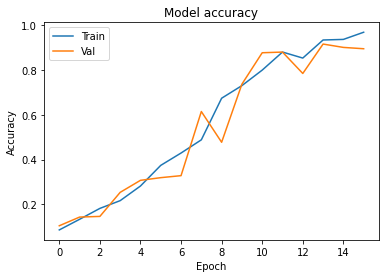

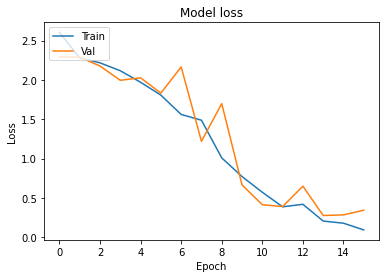

In [44]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
plot_history(history)

In [39]:
#Layered sequential model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape = (X.shape[1],), use_bias=True, bias_initializer='ones'))
model.add(Dense(64, activation='relu', use_bias=True, bias_initializer='ones'))
model.add(Dense(32, activation='relu', use_bias=True, bias_initializer='ones'))
model.add(Dense(16, activation='relu', use_bias=True, bias_initializer='ones'))        
model.add(Dense(y.shape[1], activation='sigmoid', use_bias=True, bias_initializer='ones'))

my_optimizer = SGD(lr=0.1)
model.compile(optimizer=my_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=2)

history = model.fit(X_train, y_train, validation_split=0.3, epochs=60, verbose=2, callbacks=[early_stopping_monitor])
history

score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])
print('Test loss:', score[0])

y_pred = model.predict(X_test)

Epoch 1/60
25/25 - 1s - loss: 2.6070 - accuracy: 0.0859 - val_loss: 2.2929 - val_accuracy: 0.1045
Epoch 2/60
25/25 - 0s - loss: 2.2795 - accuracy: 0.1333 - val_loss: 2.2896 - val_accuracy: 0.1433
Epoch 3/60
25/25 - 0s - loss: 2.2178 - accuracy: 0.1821 - val_loss: 2.1772 - val_accuracy: 0.1463
Epoch 4/60
25/25 - 0s - loss: 2.1171 - accuracy: 0.2167 - val_loss: 1.9956 - val_accuracy: 0.2537
Epoch 5/60
25/25 - 0s - loss: 1.9705 - accuracy: 0.2821 - val_loss: 2.0273 - val_accuracy: 0.3075
Epoch 6/60
25/25 - 0s - loss: 1.8069 - accuracy: 0.3744 - val_loss: 1.8319 - val_accuracy: 0.3194
Epoch 7/60
25/25 - 0s - loss: 1.5610 - accuracy: 0.4295 - val_loss: 2.1658 - val_accuracy: 0.3284
Epoch 8/60
25/25 - 0s - loss: 1.4874 - accuracy: 0.4885 - val_loss: 1.2193 - val_accuracy: 0.6149
Epoch 9/60
25/25 - 0s - loss: 1.0080 - accuracy: 0.6744 - val_loss: 1.6981 - val_accuracy: 0.4776
Epoch 10/60
25/25 - 0s - loss: 0.7708 - accuracy: 0.7308 - val_loss: 0.6639 - val_accuracy: 0.7373
Epoch 11/60
25/25 -

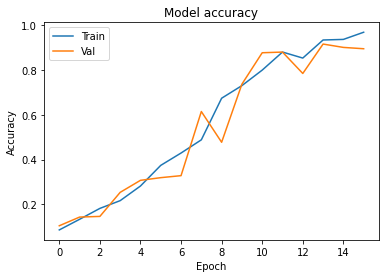

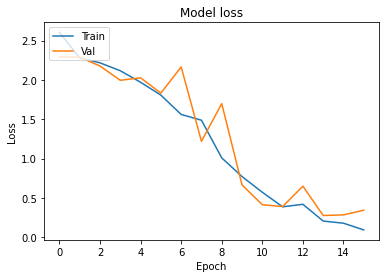

In [45]:
plot_history(history)

In [46]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Conv2D, MaxPooling2D

In [87]:
train_X, test_X, train_y, test_y = train_test_split(np.array(X).reshape((1593,16,16,-1)),\
                                                    np.array(y).reshape((1593,10)) ,test_size = 0.3, random_state=555,\
                                                   stratify=np.array(y).reshape((1593,10)))

In [99]:
#CNN
model = Sequential()
model.add(Conv2D(16, input_shape=(16, 16, 1),kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu' ))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #Nadam is a more stable optimizer
model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 16, 16, 16)        160       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 8, 8, 32)          4640      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)             

In [100]:
#train_X, test_X, train_y, test_y
history = model.fit(train_X, train_y, epochs=20, batch_size=128, validation_split=0.3, shuffle=False)

Epoch 1/20
7/7 [==============================] - 1s 66ms/step - loss: 2.2626 - accuracy: 0.1838 - val_loss: 2.0367 - val_accuracy: 0.4149
Epoch 2/20
7/7 [==============================] - 0s 35ms/step - loss: 1.9494 - accuracy: 0.4725 - val_loss: 1.6347 - val_accuracy: 0.7075
Epoch 3/20
7/7 [==============================] - 0s 35ms/step - loss: 1.5219 - accuracy: 0.6365 - val_loss: 1.1555 - val_accuracy: 0.7045
Epoch 4/20
7/7 [==============================] - 0s 35ms/step - loss: 1.0228 - accuracy: 0.7392 - val_loss: 0.8046 - val_accuracy: 0.7910
Epoch 5/20
7/7 [==============================] - 0s 34ms/step - loss: 0.7501 - accuracy: 0.7864 - val_loss: 0.6083 - val_accuracy: 0.8209
Epoch 6/20
7/7 [==============================] - 0s 36ms/step - loss: 0.5530 - accuracy: 0.8220 - val_loss: 0.4917 - val_accuracy: 0.8299
Epoch 7/20
7/7 [==============================] - 0s 36ms/step - loss: 0.4161 - accuracy: 0.8721 - val_loss: 0.3626 - val_accuracy: 0.9015
Epoch 8/20
7/7 [===========

In [101]:
score = model.evaluate(test_X, test_y)
print('Test accuracy:', score[1])
print('Test loss:', score[0]) 

15/15 [==============================] - 0s 5ms/step - loss: 0.1605 - accuracy: 0.9561
Test accuracy: 0.9560669660568237
Test loss: 0.16051103174686432


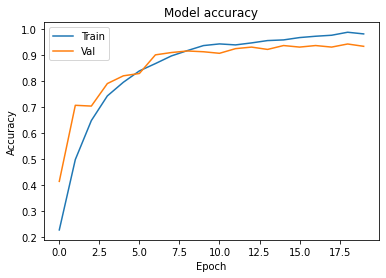

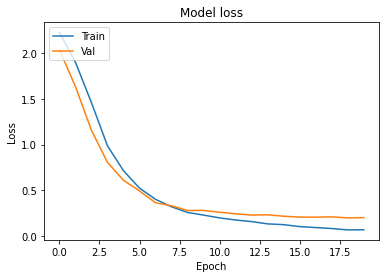

In [102]:
plot_history(history)

In [103]:
y_pred = model.predict(test_X)